In [11]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             mean_absolute_error)
from sklearn.model_selection import GridSearchCV, train_test_split
# read and concat data
X_chall = pd.read_csv('processed_challenger_match_data.csv')
X_gm = pd.read_csv('processed_gm_match_data.csv')
X_full = pd.concat([X_chall, X_gm], axis = 'index')
# remove duplicates
X_full = X_full.drop_duplicates().copy()
import re
# filter columns
features = ['level', 'placement']

trait_names = re.compile("traits_._name")
trait_nums = re.compile("traits_._num")
trait_tier_current = re.compile("traits_._tier_current")
trait_tier_total = re.compile("traits_._tier_total")
units_id = re.compile("units_._character")
units_rarity = re.compile("units_._rarity")
units_tier = re.compile("units_._tier")
itemnames = re.compile("units_._itemNames")
needed_columns = [ trait_names, trait_nums, trait_tier_current, trait_tier_total, units_id, units_rarity, units_tier, itemnames]
combine_columns = [ trait_names, trait_nums, trait_tier_current, trait_tier_total, units_id, units_rarity, units_tier, itemnames]
for filters in needed_columns:
    features += list(filter(filters.match, X_full.columns))

X = X_full[features]
for filters in combine_columns:
    features += list(filter(filters.match, X_full.columns))

X_comebine = X_full[features]
# convert dtypes of discrete columns
for colname in list(X.select_dtypes("float64")):
    X[colname] = X[colname].astype(float).astype("Int64")

# create new feature for total item number
item_columns = [column for column in X.columns if 'item' in column]
X['total_items'] = X[item_columns].count(axis = 'columns').copy()
X = X.drop(item_columns, axis = 'columns')

# change NaNs of categoricals
X = X.fillna(0)

/var/folders/2r/lkmkhwss2rjbxkptb7z7g63r0000gn/T/ipykernel_22547/254911223.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colname] = X[colname].astype(float).astype("Int64")
/var/folders/2r/lkmkhwss2rjbxkptb7z7g63r0000gn/T/ipykernel_22547/254911223.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[colname] = X[colname].astype(float).astype("Int64")
/var/folders/2r/lkmkhwss2rjbxkptb7z7g63r0000gn/T/ipykernel_22547/254911223.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [12]:
# Drop all categorical variables
X_numerical = X.select_dtypes(include=[np.number])

# Replace 'placement' column for binary classification
y = X_numerical['placement'].replace({1:1, 2:1, 3:1, 4:1, 5:0, 6:0, 7:0, 8:0})
X_numerical.drop('placement', axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8146


In [13]:
from sklearn.linear_model import LogisticRegression

# Assuming you have already defined X_train, X_test, y_train, y_test

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Get the coefficients
coefficients = logreg.coef_[0]  # Coefficients for the features

# Create a DataFrame for easy sorting
feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of the coefficients to find the most influential features
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
top_coefficients = coef_df.sort_values(by='abs_coef', ascending=False).head(20)

print(top_coefficients[['Feature', 'Coefficient']])


                  Feature  Coefficient
0                   level     1.153103
44           units_4_tier     0.970698
48           units_8_tier     0.885505
45           units_5_tier     0.885340
42           units_2_tier     0.769808
46           units_6_tier     0.757524
43           units_3_tier     0.697703
41           units_1_tier     0.645209
47           units_7_tier     0.629268
40           units_0_tier     0.476318
49            total_items     0.314573
19  traits_8_tier_current     0.249029
36         units_5_rarity     0.220336
11  traits_0_tier_current     0.183728
23    traits_2_tier_total    -0.180285
32         units_1_rarity     0.167206
5      traits_4_num_units    -0.164810
1      traits_0_num_units    -0.160798
25    traits_4_tier_total    -0.160779
24    traits_3_tier_total    -0.152039


                  feature  importance
49            total_items    0.162046
0                   level    0.068704
39         units_8_rarity    0.045093
48           units_8_tier    0.044108
44           units_4_tier    0.036624
47           units_7_tier    0.032774
38         units_7_rarity    0.029518
45           units_5_tier    0.029200
46           units_6_tier    0.028787
43           units_3_tier    0.025693
42           units_2_tier    0.024063
41           units_1_tier    0.016777
37         units_6_rarity    0.015746
3      traits_2_num_units    0.014817
10     traits_9_num_units    0.014707
25    traits_4_tier_total    0.014537
8      traits_7_num_units    0.014325
6      traits_5_num_units    0.014256
9      traits_8_num_units    0.014253
4      traits_3_num_units    0.014090
30    traits_9_tier_total    0.013608
2      traits_1_num_units    0.013277
27    traits_6_tier_total    0.013119
29    traits_8_tier_total    0.013084
7      traits_6_num_units    0.013060
40          

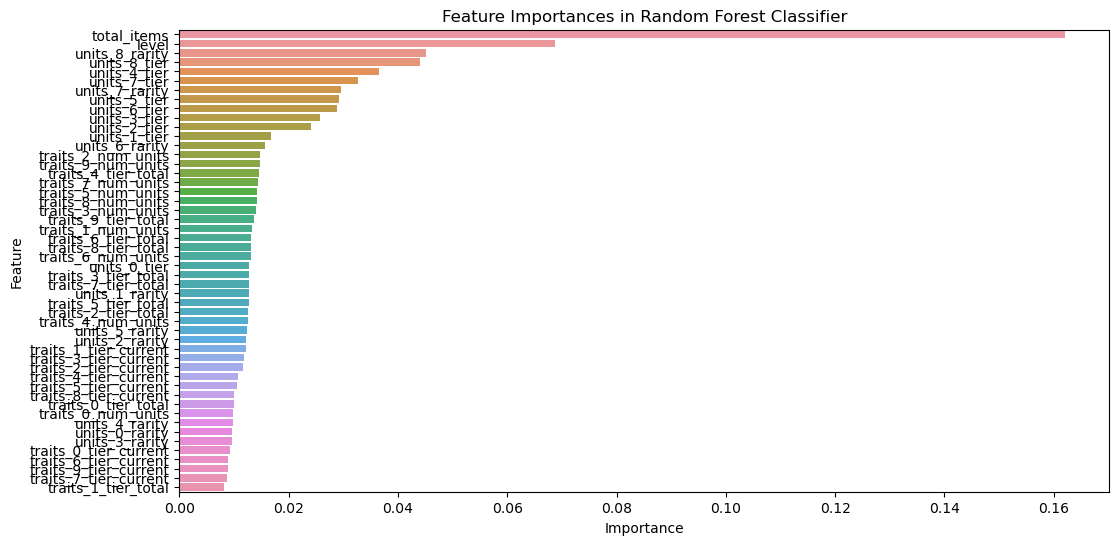

In [14]:
# Assuming your Random Forest model is named 'rf_classifier' and is already trained
importances = rf_classifier.feature_importances_

# Get the feature names from the dataset
feature_names = X_numerical.columns

# Create a DataFrame to display importance and feature name
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(importance_df)

# Plotting feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
# Combine the traits columns into a single list column
traits_columns = [f'traits_{i}_name' for i in range(10)]
X['combined_traits'] = X[traits_columns].apply(lambda row: [trait for trait in row if pd.notnull(trait)], axis=1)

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Convert all items in the combined list to strings
X['combined_traits'] = X['combined_traits'].apply(lambda lst: [str(item) for item in lst])

# Now, try fitting and transforming with MultiLabelBinarizer again
X_encoded = mlb.fit_transform(X['combined_traits'])

from sklearn.preprocessing import MultiLabelBinarizer

X_encoded_df = pd.DataFrame(X_encoded, columns=mlb.classes_)
X_encoded_df = X_encoded_df.drop(columns=['0'])

In [16]:
units_columns = [f'units_{i}_character_id' for i in range(9)]
X['combined_units'] = X[units_columns].apply(lambda row: [unit for unit in row if pd.notnull(unit)], axis=1)

# Convert all items in the combined list to strings
X['combined_units'] = X['combined_units'].apply(lambda lst: [str(item) for item in lst])

# Now, try fitting and transforming with MultiLabelBinarizer again
X_encoded_units = mlb.fit_transform(X['combined_units'])

X_encoded_units_df = pd.DataFrame(X_encoded_units, columns=mlb.classes_)
X_encoded_units_df = X_encoded_units_df.drop(columns=['0'])

In [17]:
# Converting 'placement' into a binary variable
# Placement 1-4 are converted to 0 and 5-8 are converted to 1
X['placement_binary'] = X['placement'].apply(lambda x: 1 if x >= 5 else 0)

X[['placement', 'placement_binary']].head()


,placement,placement_binary
0,2,0
1,4,0
2,3,0
3,6,1
4,1,0


In [18]:
# Ensuring all columns are of appropriate type for XGBoost
# For this, we will convert all non-numeric columns to categorical and then use pd.get_dummies to encode them
non_numeric_cols = X.select_dtypes(exclude=["int64", "float64", "bool"]).columns
X[non_numeric_cols] = X[non_numeric_cols].astype('category')

# Get dummies (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# Define features (X) and target (y)
y = X_encoded['placement_binary']
X_encoded.drop(['placement', 'placement_binary'], axis=1, inplace=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



TypeError: unhashable type: 'list'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fitting the model on the training data
log_reg.fit(X_train, y_train)

# Predicting on the test data
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
#classification_rep = classification_report(y_test, y_pred)


# Evaluating the model
f1_score = f1_score(y_test, y_pred)
#f1_score = f1_score(y_test, y_pred)
accuracy, f1_score


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# For logistic regression, we use a pseudo R-squared value as R-squared is not defined for logistic models in the same way as it is for linear models.
# However, we can use a score method which returns the mean accuracy on the given test data and labels - this is somewhat analogous to R-squared in linear regression
pseudo_r_squared = log_reg.score(X_test, y_test)

rmse, pseudo_r_squared


In [ ]:
# Assuming log_reg is an instance of a logistic regression model and it has been fitted already:
coefficients = log_reg.coef_[0]
feature_names = X_train.columns

# Create a DataFrame to hold feature names and their corresponding coefficients (importance)
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the DataFrame by importance in descending order and select the top 20
top_20_features = feature_importance_df.sort_values(by='Importance', ascending=False)
top_20_features

In [ ]:
# Adjusting the provided code snippet to focus on filtering features that start with 'units_*_character_id_'
# and then selecting the top 20 features based on importance. This assumes 'feature_importance_df' is already defined
# with columns 'Feature' and 'Importance'.

# Filter features starting with 'units_*_character_id_'
units_character_id_features = feature_importance_df[feature_importance_df['Feature'].str.contains(r'^Set8_')]

# Sort by importance and select the top 20
top_20_units_character_id_features = units_character_id_features.sort_values(by='Importance', ascending=False).head(100)

top_20_units_character_id_features

In [ ]:
# Filter features starting with 'units_*_character_id_'
units_character_id_features = feature_importance_df[feature_importance_df['Feature'].str.contains(r'TFT8_')]

# Sort by importance and select the top 20
top_20_units_character_id_features = units_character_id_features.sort_values(by='Importance', ascending=False).head(200)

top_20_units_character_id_features